# **Import**

In [1]:
import warnings

warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler

# **Data Load**

In [3]:
cd /content/drive/MyDrive/[Projects]/Kaggle/NASA 터보팬 제트 엔진의 잔존 수명 예측 및 예지보전 방안/Data

/content/drive/MyDrive/[Projects]/Kaggle/NASA 터보팬 제트 엔진의 잔존 수명 예측 및 예지보전 방안/Data


In [4]:
index_names = ['unit_number', 'time_cycles']
setting_names = ['setting_1', 'setting_2', 'setting_3']
sensor_names = [f's_{i + 1}' for i in range(21)]
col_names = index_names + setting_names + sensor_names

train_df = pd.read_csv('./train_FD001.txt',
                       sep='\s+',
                       header=None,
                       index_col=False,
                       names=col_names)

In [ ]:
train_df

unit_number  time_cycles  setting_1  setting_2  setting_3     s_1  \
0                1            1    -0.0007    -0.0004      100.0  518.67   
1                1            2     0.0019    -0.0003      100.0  518.67   
2                1            3    -0.0043     0.0003      100.0  518.67   
3                1            4     0.0007     0.0000      100.0  518.67   
4                1            5    -0.0019    -0.0002      100.0  518.67   
...            ...          ...        ...        ...        ...     ...   
20626          100          196    -0.0004    -0.0003      100.0  518.67   
20627          100          197    -0.0016    -0.0005      100.0  518.67   
20628          100          198     0.0004     0.0000      100.0  518.67   
20629          100          199    -0.0011     0.0003      100.0  518.67   
20630          100          200    -0.0032    -0.0005      100.0  518.67   

          s_2      s_3      s_4    s_5  ...    s_12     s_13     s_14    s_15  \
0      641.82  1589.70  1400.60  14.62  ...  521.66  2388.02  8138.62  8.4195   
1      642.15  1591.82  1403.14  14.62  ...  522.28  2388.07  8131.49  8.4318   
2      642.35  1587.99  1404.20  14.62  ...  522.42  2388.03  8133.23  8.4178   
3      642.35  1582.79  1401.87  14.62  ...  522.86  2388.08  8133.83  8.3682   
4      642.37  1582.85  1406.22  14.62  ...  522.19  2388.04  8133.80  8.4294   
...       ...      ...      ...    ...  ...     ...      ...      ...     ...   
20626  643.49  1597.98  1428.63  14.62  ...  519.49  2388.26  8137.60  8.4956   
20627  643.54  1604.50  1433.58  14.62  ...  519.68  2388.22  8136.50  8.5139   
20628  643.42  1602.46  1428.18  14.62  ...  520.01  2388.24  8141.05  8.5646   
20629  643.23  1605.26  1426.53  14.62  ...  519.67  2388.23  8139.29  8.5389   
20630  643.85  1600.38  1432.14  14.62  ...  519.30  2388.26  8137.33  8.5036   

       s_16  s_17  s_18   s_19   s_20     s_21  
0      0.03   392  2388  100.0  39.06  23.4190  
1      0.03   392  2388  100.0  39.00  23.4236  
2      0.03   390  2388  100.0  38.95  23.3442  
3      0.03   392  2388  100.0  38.88  23.3739  
4      0.03   393  2388  100.0  38.90  23.4044  
...     ...   ...   ...    ...    ...      ...  
20626  0.03   397  2388  100.0  38.49  22.9735  
20627  0.03   395  2388  100.0  38.30  23.1594  
20628  0.03   398  2388  100.0  38.44  22.9333  
20629  0.03   395  2388  100.0  38.29  23.0640  
20630  0.03   396  2388  100.0  38.37  23.0522  

[20631 rows x 26 columns]

In [ ]:
train_df.to_csv('./train_FD001.csv')

# **EDA**

## **s1 ~ s21**

In [5]:
max_cycle = train_df.groupby('unit_number')['time_cycles'].max().reset_index()
max_cycle.columns = ['unit_number', 'max_cycle']

train_df = train_df.merge(max_cycle, on='unit_number', how='left')

train_df['RUL'] = train_df['max_cycle'] - train_df['time_cycles']

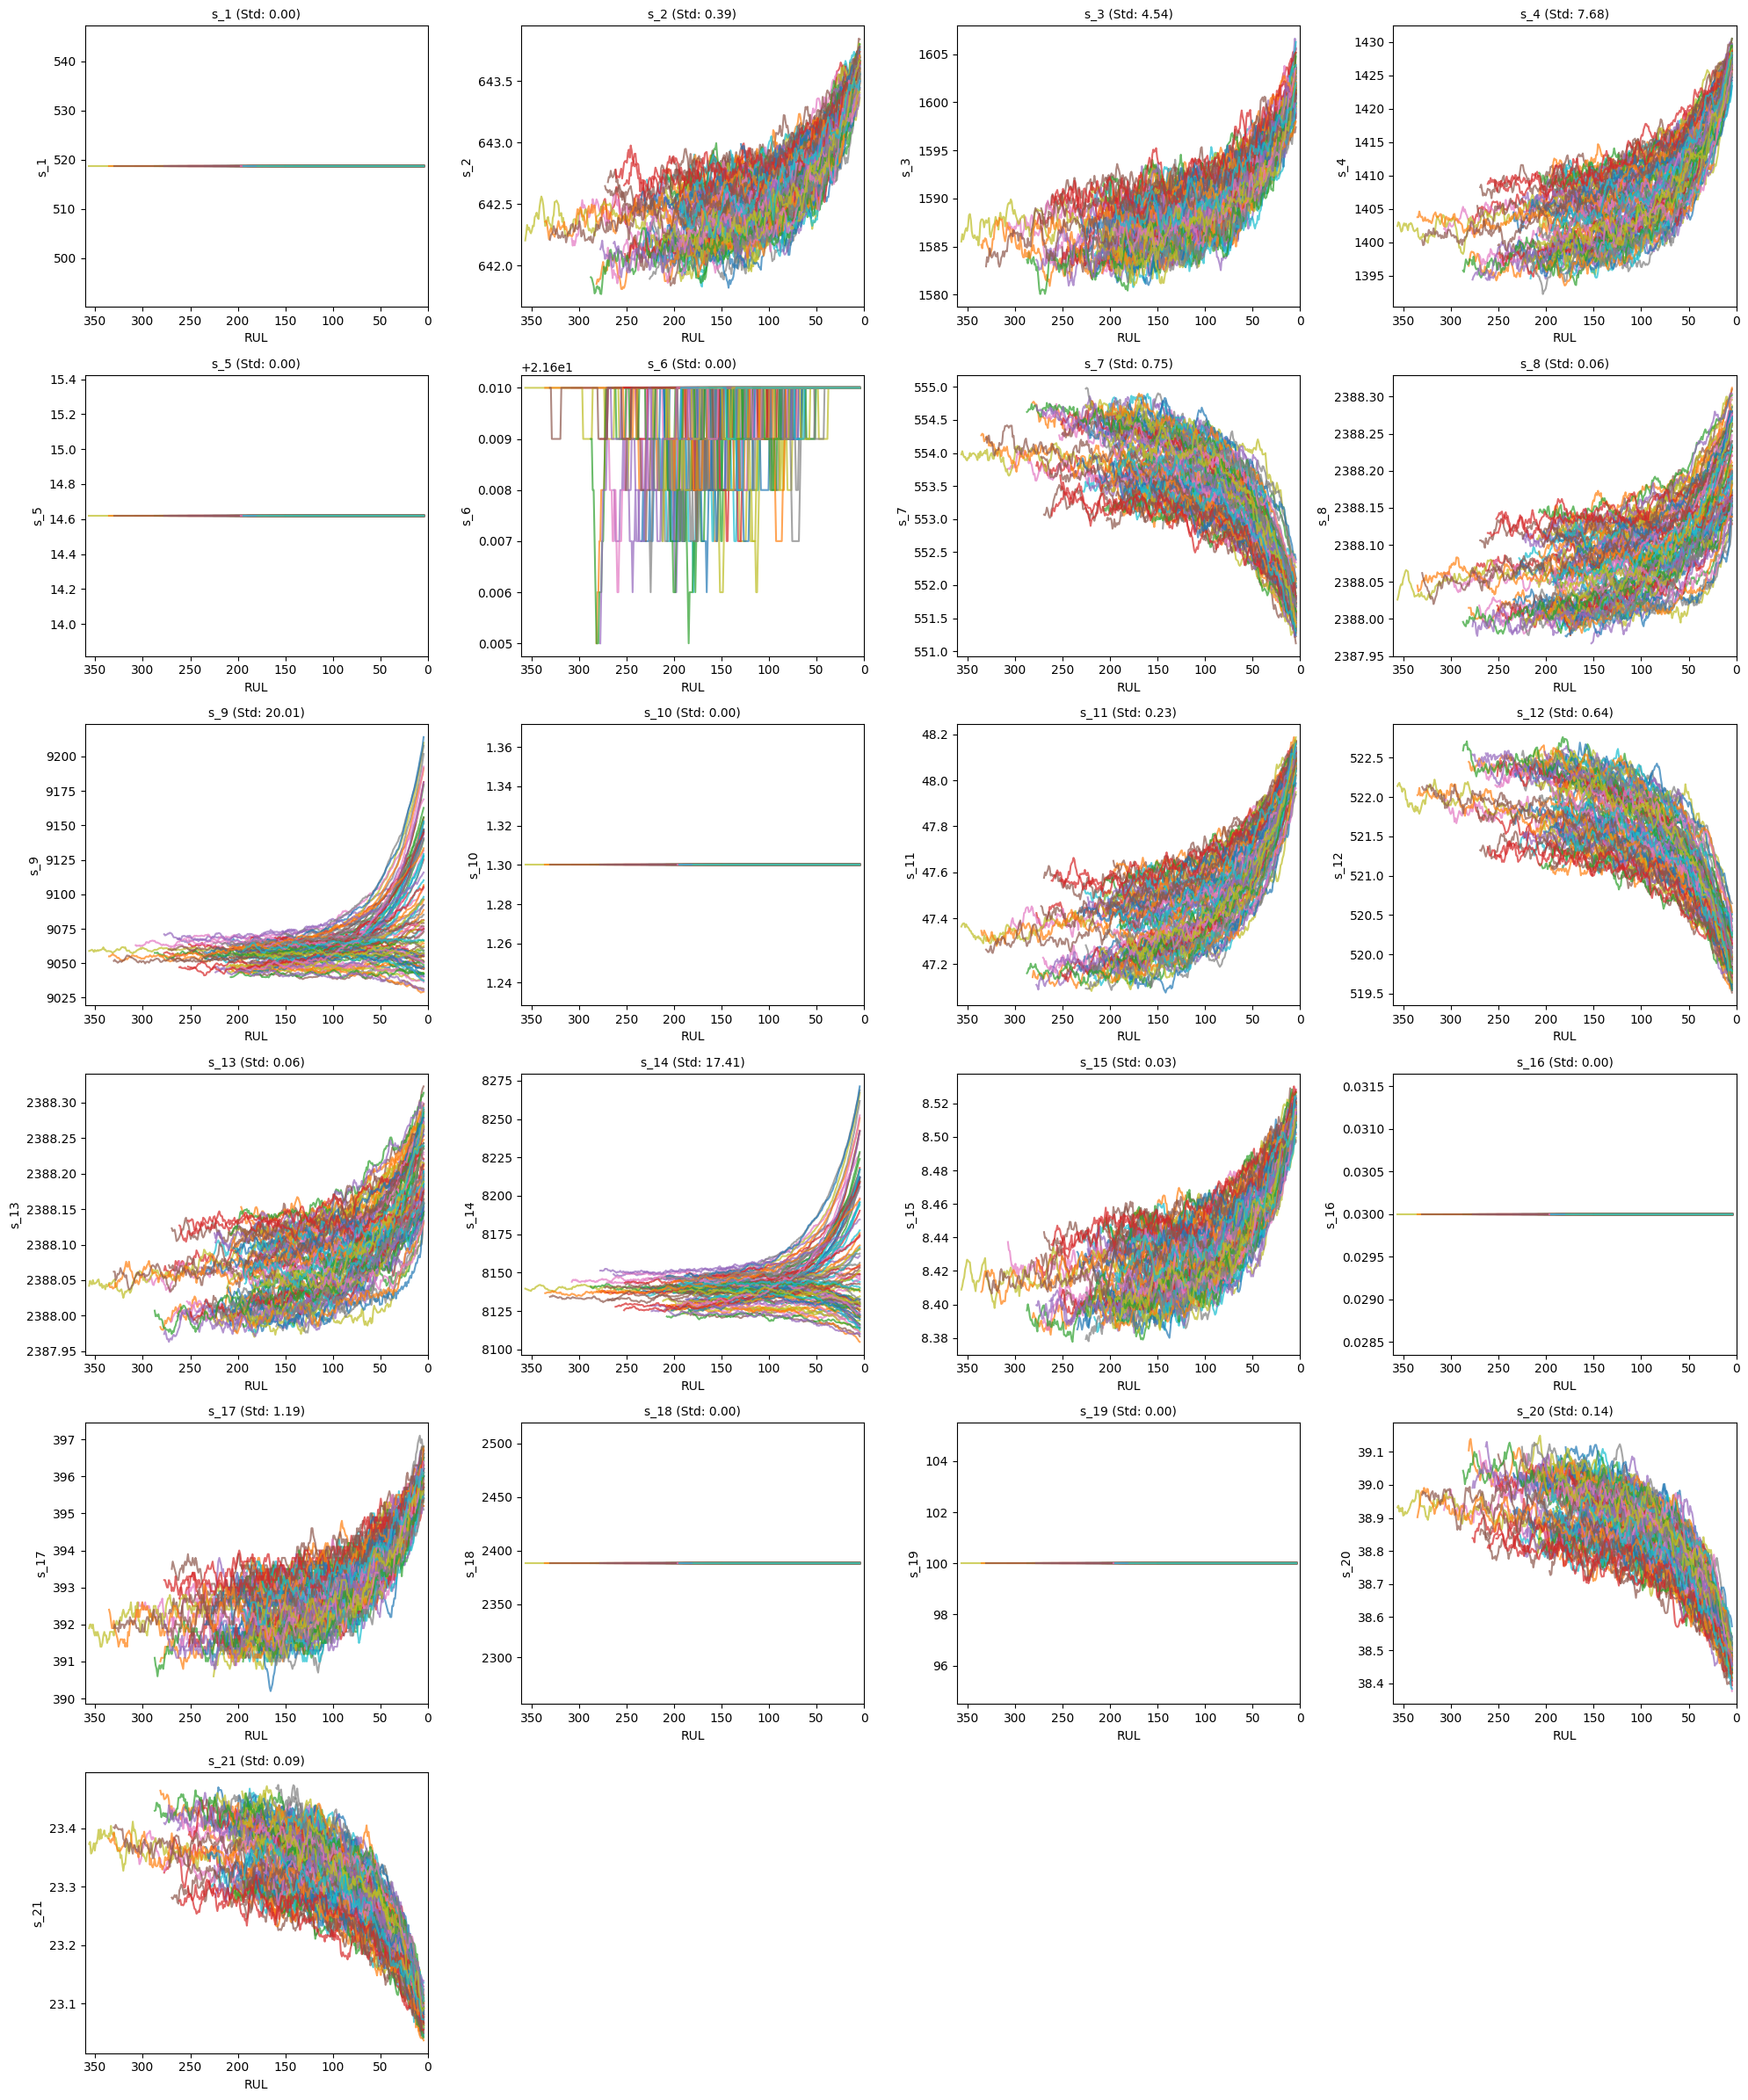

In [6]:
units = train_df['unit_number'].unique()

# subplot grid 설정
n_cols = 4
n_rows = int(np.ceil(len(sensor_names) / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 4 * n_rows))
axes = axes.flatten()

for idx, sensor in enumerate(sensor_names):
    ax = axes[idx]

    sensor_values = []
    for unit in units:
        unit_data = train_df[train_df['unit_number'] == unit][['RUL', sensor]]
        unit_data_rolling = unit_data.rolling(10).mean()
        ax.plot(unit_data_rolling['RUL'], unit_data_rolling[sensor], alpha=0.7)
        sensor_values.extend(unit_data_rolling[sensor].dropna().values)

    sensor_std = np.std(sensor_values)
    ax.set_xlim(train_df['RUL'].max(), 0)
    ax.set_xlabel('RUL')
    ax.set_ylabel(sensor)
    ax.set_title(f'{sensor} (Std: {sensor_std:.2f})', fontsize=10)

# 나머지 빈 subplot 제거
for j in range(idx + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


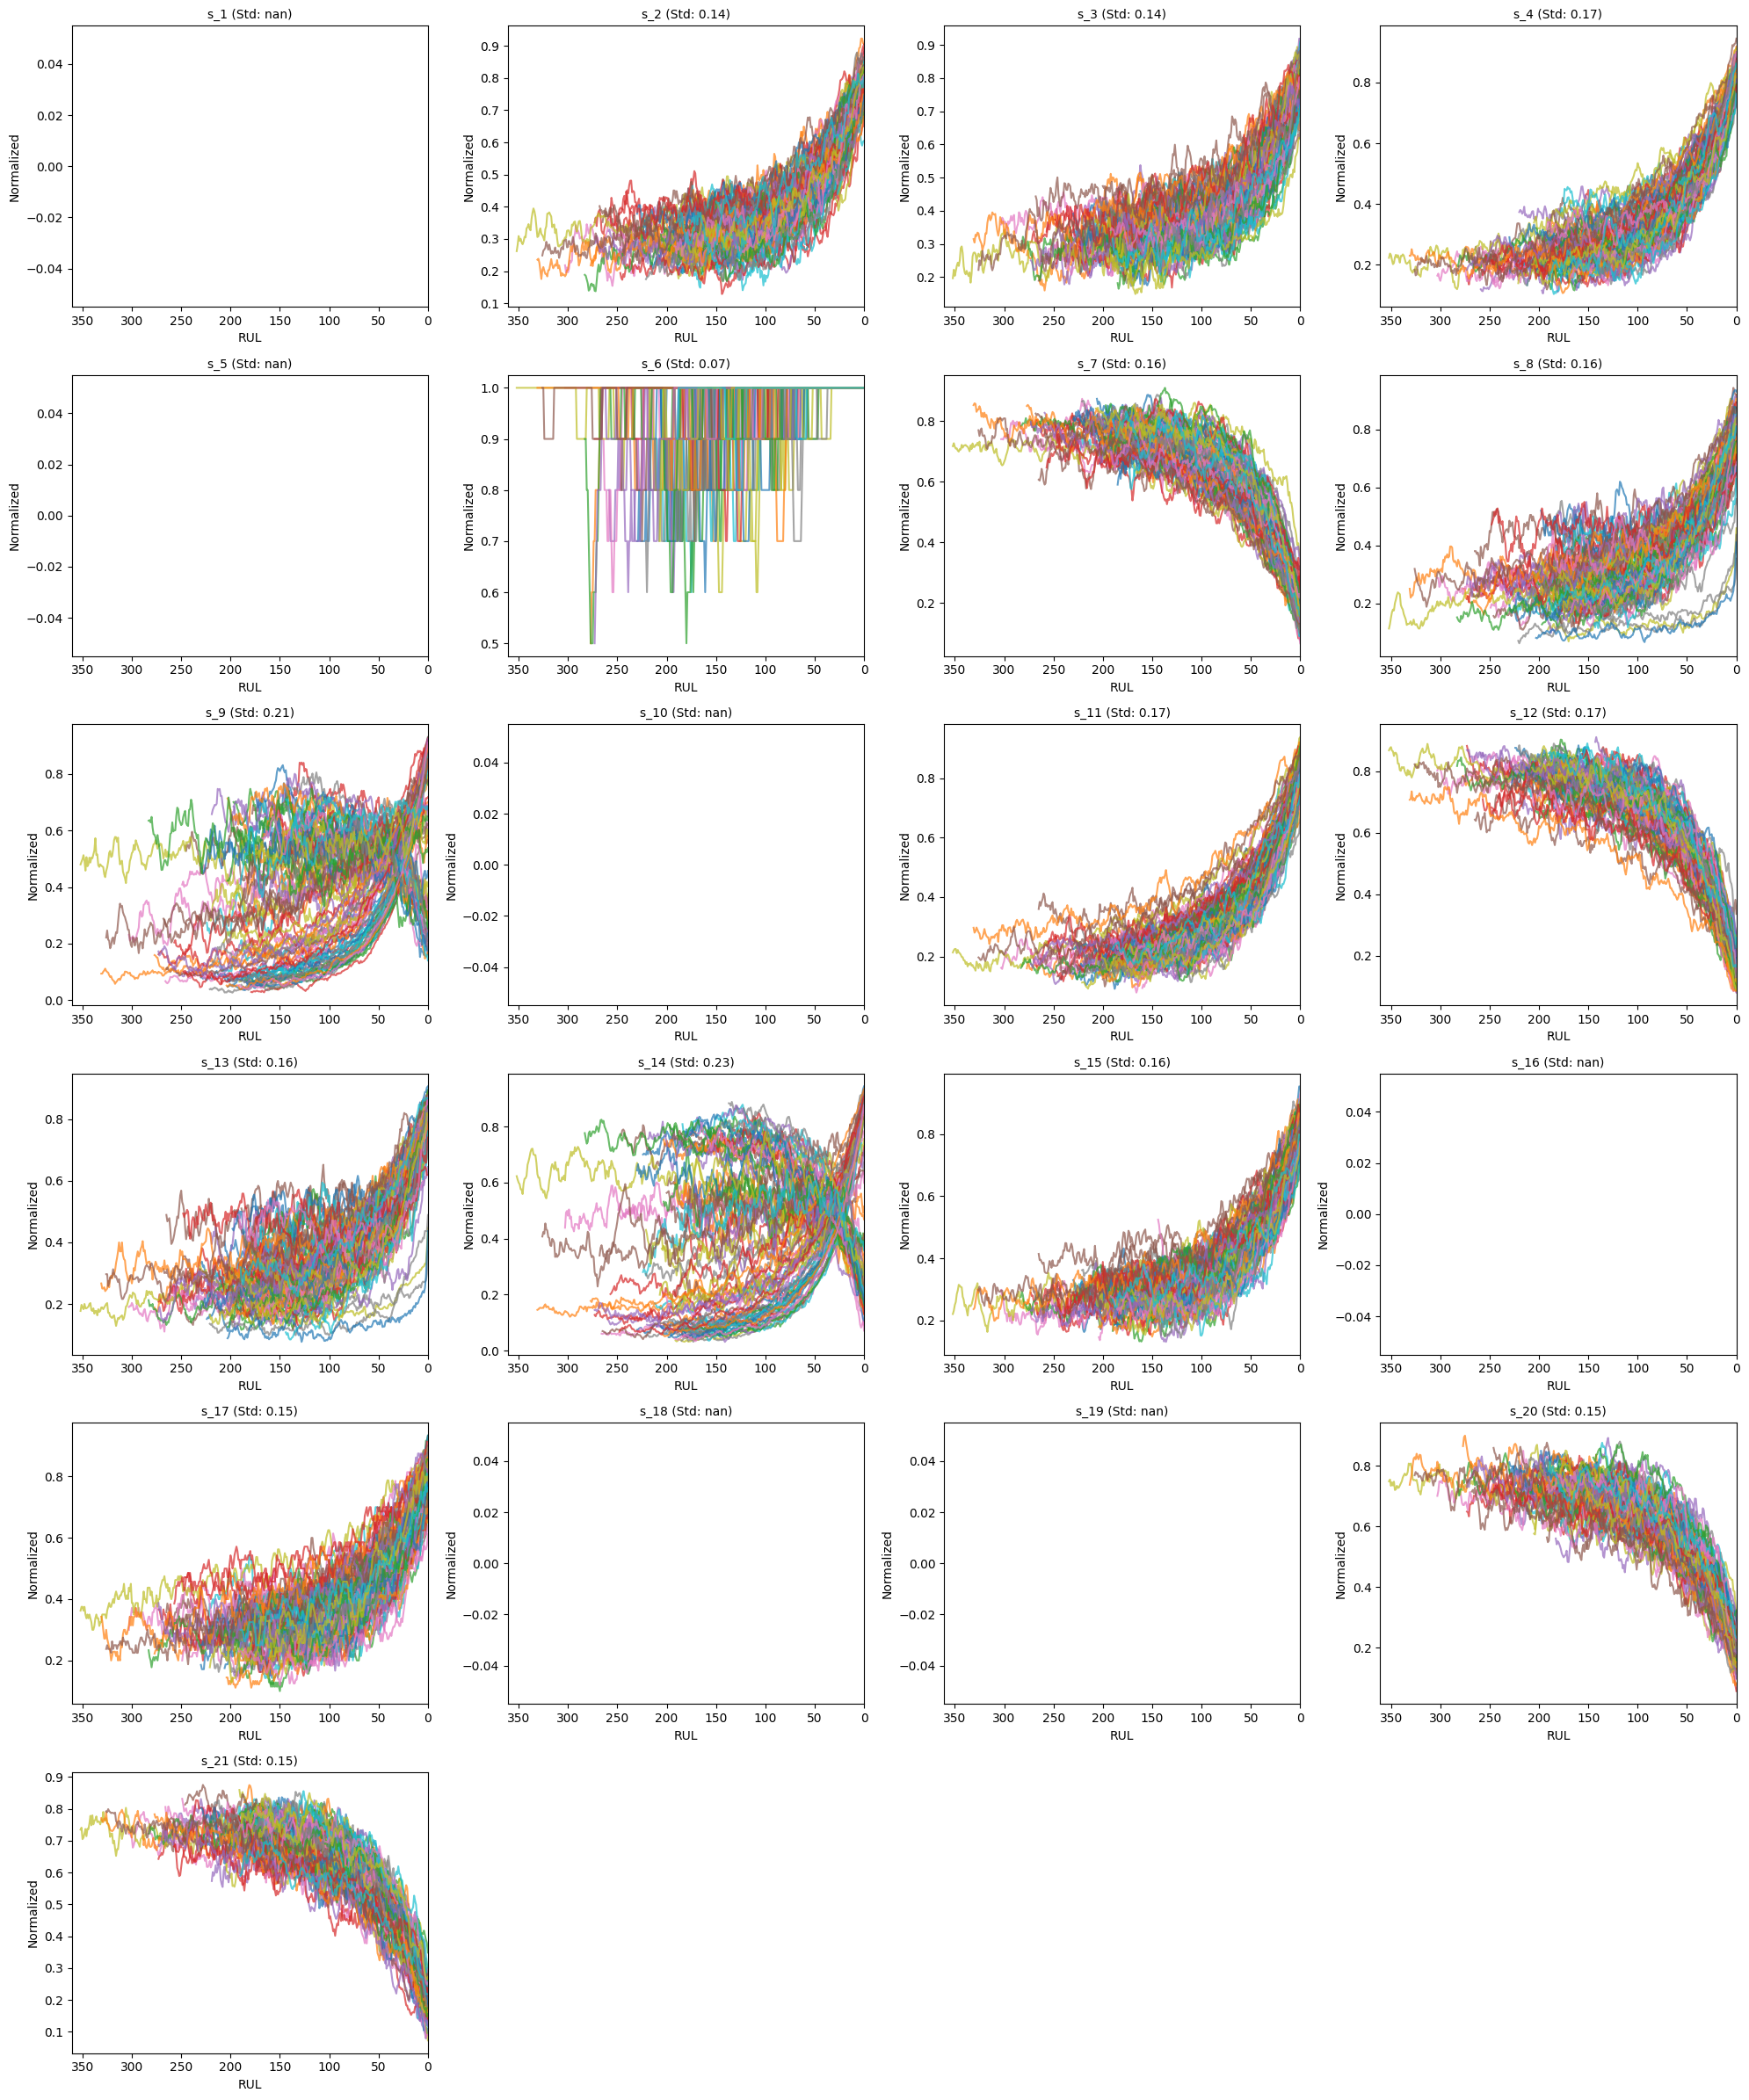

In [7]:
units = train_df['unit_number'].unique()

# subplot grid 설정
n_cols = 4
n_rows = int(np.ceil(len(sensor_names) / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 4 * n_rows))
axes = axes.flatten()

for idx, sensor in enumerate(sensor_names):
    ax = axes[idx]

    sensor_values = []
    for unit in units:
        unit_data = train_df[train_df['unit_number'] == unit][['RUL', sensor]]

        # 센서별 정규화 (unit 단위로)
        sensor_norm = (unit_data[sensor] - unit_data[sensor].min()) / \
                      (unit_data[sensor].max() - unit_data[sensor].min())

        # rolling mean 적용
        sensor_norm_rolling = sensor_norm.rolling(10).mean()

        ax.plot(unit_data['RUL'], sensor_norm_rolling, alpha=0.7)

        sensor_values.extend(sensor_norm_rolling.dropna().values)

    sensor_std = np.std(sensor_values)
    ax.set_xlim(train_df['RUL'].max(), 0)
    ax.set_xlabel('RUL')
    ax.set_ylabel('Normalized')
    ax.set_title(f'{sensor} (Std: {sensor_std:.2f})', fontsize=10)

# 남는 subplot은 제거
for j in range(idx + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

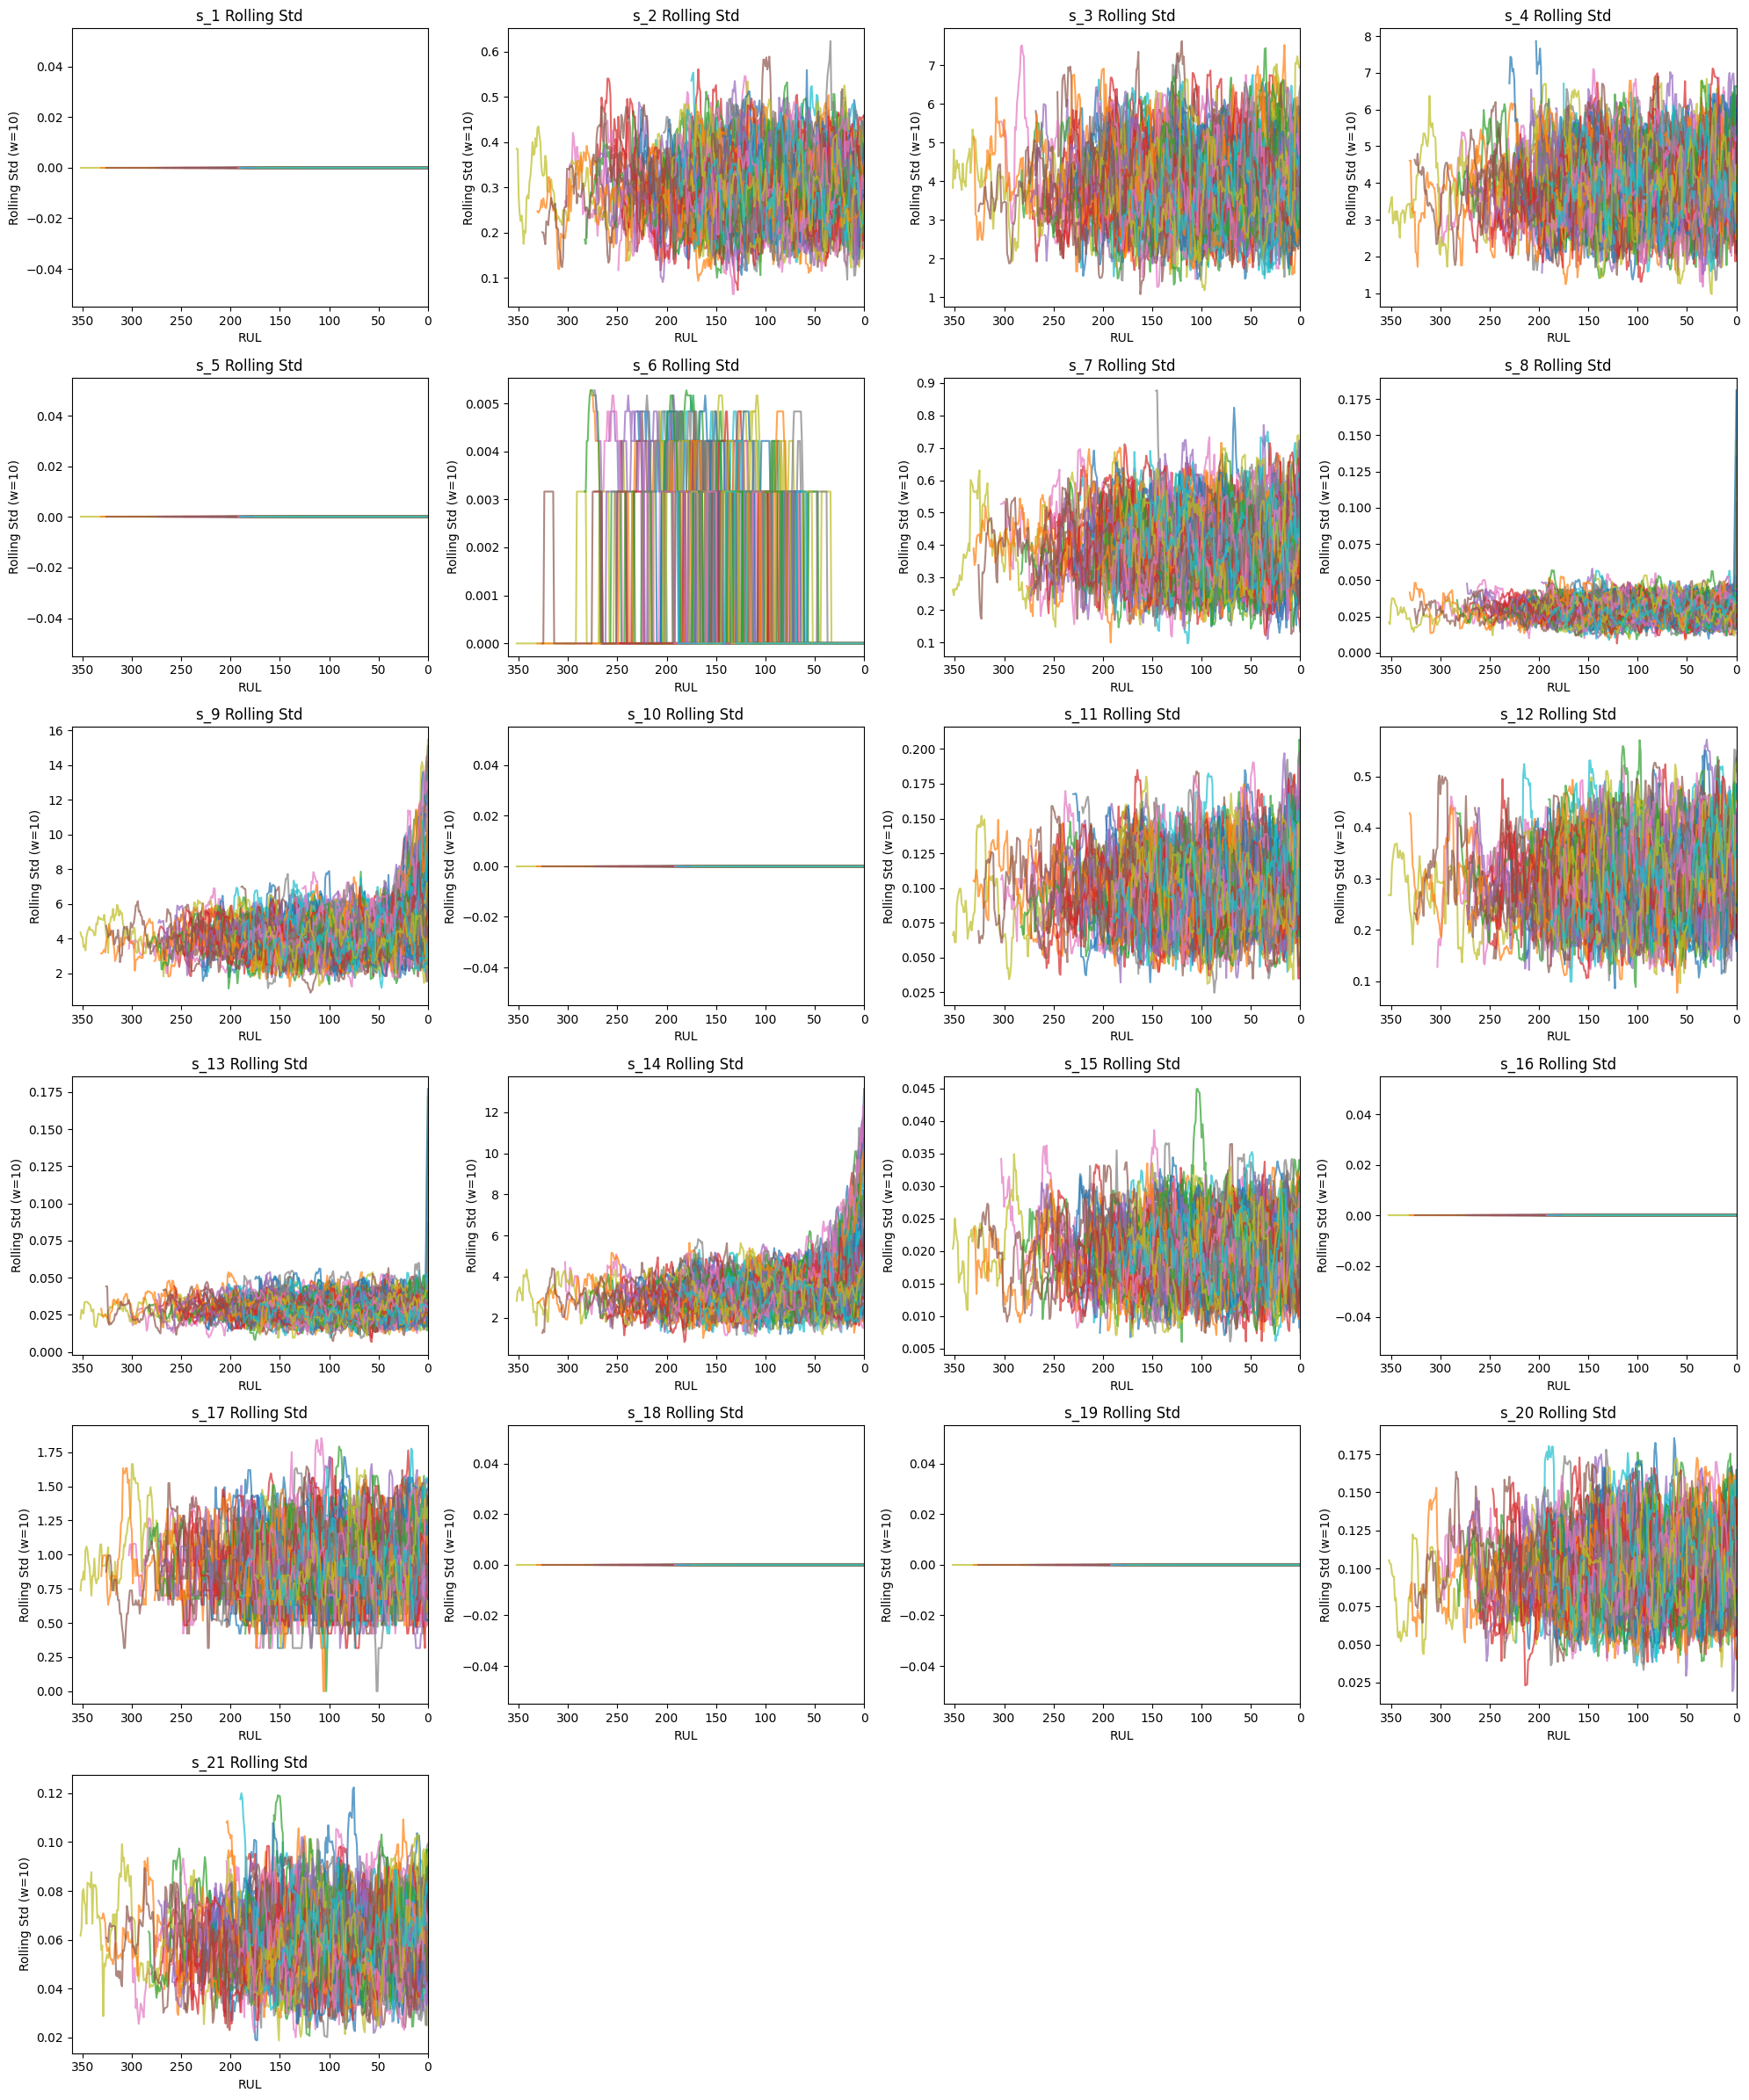

In [8]:
units = train_df['unit_number'].unique()

# subplot grid 설정
n_cols = 4
n_rows = int(np.ceil(len(sensor_names) / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 4 * n_rows))
axes = axes.flatten()

for idx, sensor in enumerate(sensor_names):
    ax = axes[idx]

    for unit in units:
        unit_data = train_df[train_df['unit_number'] == unit][['RUL', sensor]].copy()
        unit_data['rolling_std'] = unit_data[sensor].rolling(10).std()

        ax.plot(unit_data['RUL'], unit_data['rolling_std'], alpha=0.7)

    ax.set_xlim(train_df['RUL'].max(), 0)
    ax.set_xlabel('RUL')
    ax.set_ylabel('Rolling Std (w=10)')
    ax.set_title(f'{sensor} Rolling Std')

# 남는 subplot 삭제
for j in range(idx + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [9]:
units = train_df['unit_number'].unique()

# subplot grid 설정 (4x5)
n_cols = 4
n_rows = int(np.ceil(len(sensor_names) / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 4 * n_rows))
axes = axes.flatten()

for idx, sensor in enumerate(sensor_names):
    ax = axes[idx]

    for unit in units:
        unit_data = train_df[train_df['unit_number'] == unit][['RUL', sensor]].copy()

        # 개별 단위 정규화
        sensor_norm = (unit_data[sensor] - unit_data[sensor].min()) / (
            unit_data[sensor].max() - unit_data[sensor].min()
        )

        # rolling std 계산
        sensor_norm_rolling = sensor_norm.rolling(10).std()

        ax.plot(unit_data['RUL'], sensor_norm_rolling, alpha=0.7)

    ax.set_xlim(train_df['RUL'].max(), 0)
    ax.set_xlabel('RUL')
    ax.set_ylabel('Rolling Std (Norm)')
    ax.set_title(f'{sensor} (Rolling Std)')

# 남는 subplot 제거
for j in range(idx + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Output hidden; open in https://colab.research.google.com to view.

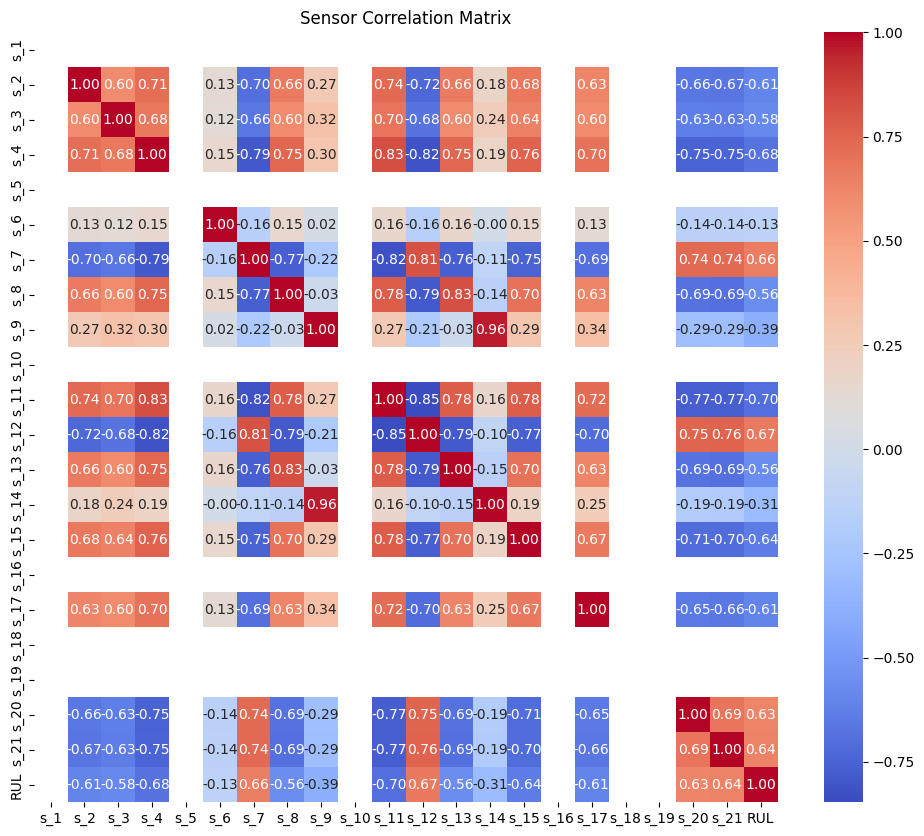

In [ ]:
sensor_data = train_df[sensor_names + ['RUL']]
corr = sensor_data.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Sensor Correlation Matrix")
plt.show()

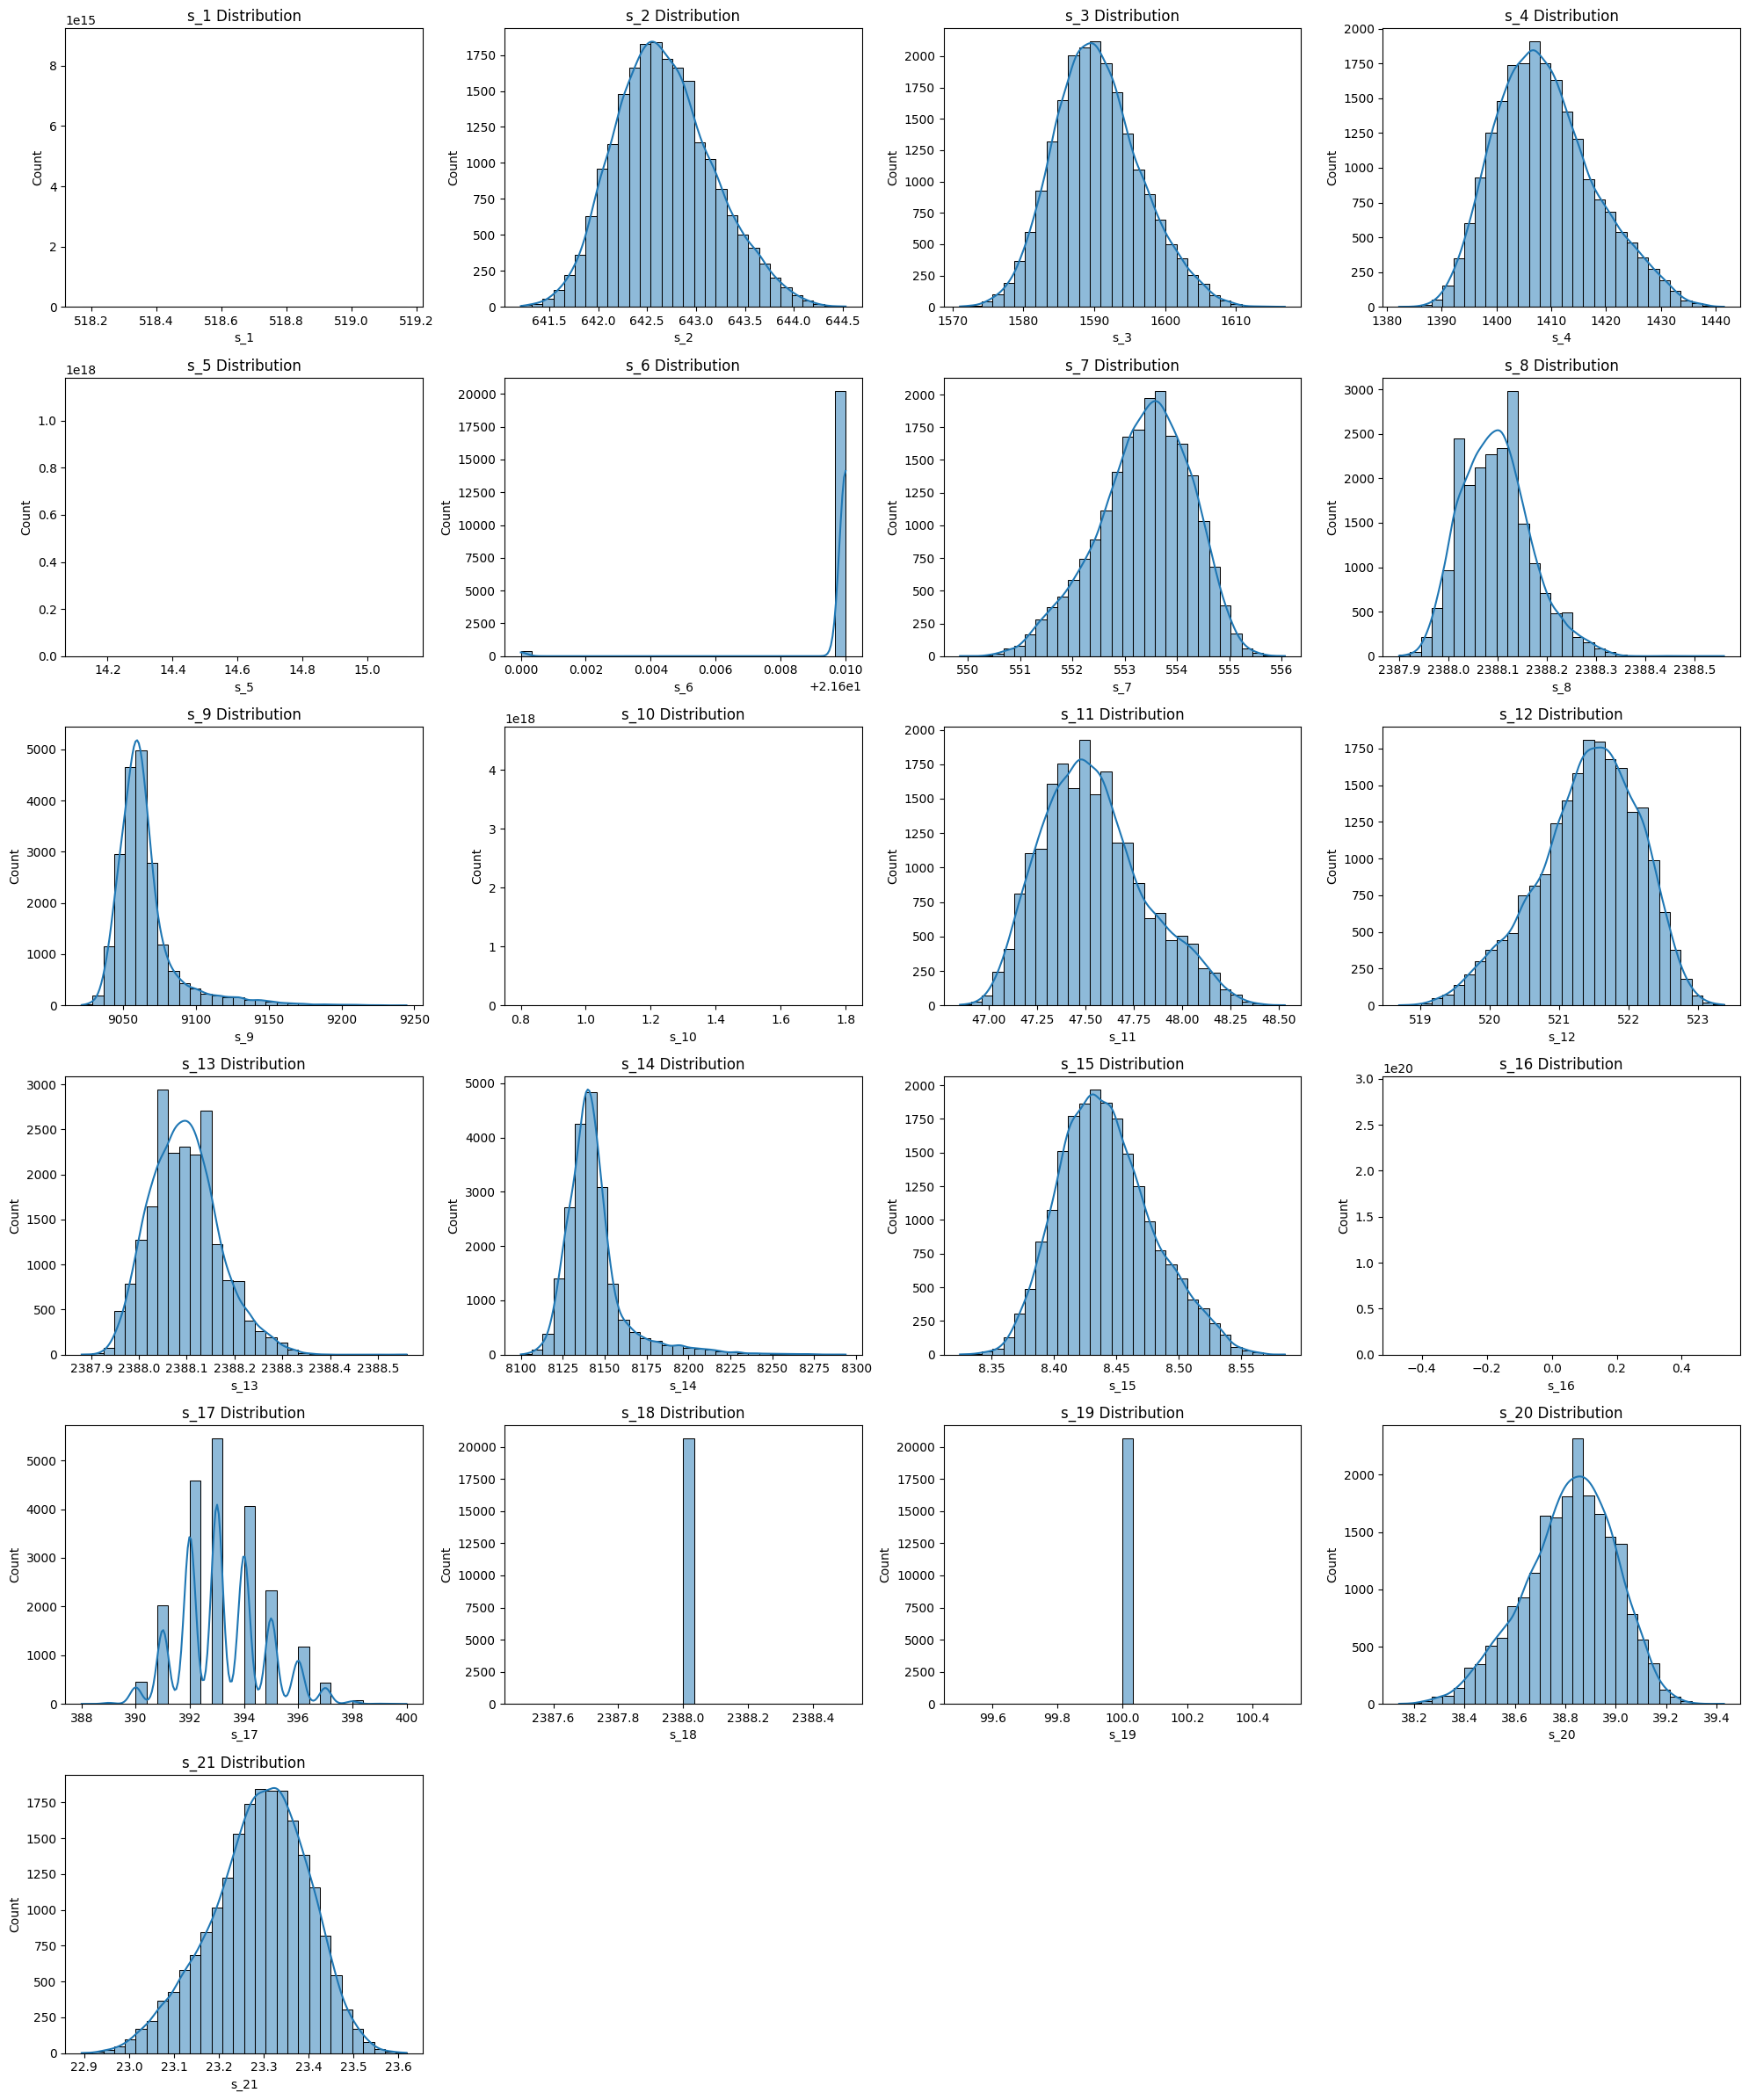

In [10]:
n_cols = 4
n_rows = int(np.ceil(len(sensor_names) / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 4 * n_rows))
axes = axes.flatten()

for idx, sensor in enumerate(sensor_names):
    ax = axes[idx]
    sns.histplot(train_df[sensor], kde=True, bins=30, ax=ax)
    ax.set_title(f"{sensor} Distribution")

# 남는 subplot 제거
for j in range(idx + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()